<a href="https://colab.research.google.com/github/arashpeighambari/Branch-and-Bound-with-Basic-Parallelization-ML/blob/main/Branch_and_bound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Traveling Salesman Problem (TSP)

Verifying branch-n-bound angainst brute-force

In [ ]:
import math
import time
import baseline_bb
from baseline_bb import branch_and_bound_standard, nodes_expanded_std
from brute_force import brute_force_tsp

if __name__ == '__main__':
    # An example 5 city TSP instance
    cost_matrix = [
        [0, 10, 15, 20, 10],
        [10, 0, 35, 25, 20],
        [15, 35, 0, 30, 15],
        [20, 25, 30, 0, 35],
        [10, 20, 15, 35, 0]
    ]
    n = len(cost_matrix)

    # Run the branch-and-bound method
    best = [math.inf, []]
    baseline_bb.nodes_expanded_std = 0

    start_time = time.time()
    branch_and_bound_standard(0, {0}, [0], 0, cost_matrix, n, best)
    runtime_bnb = time.time() - start_time

    print("Branch-and-Bound Solution:")
    print("  Best tour cost:", best[0])
    print("  Best tour path:", best[1])
    print("  Runtime (seconds):", runtime_bnb)
    print("  Nodes expanded:", baseline_bb.nodes_expanded_std)

    # Run the brute-force
    start_time = time.time()
    brute_cost, brute_path = brute_force_tsp(cost_matrix)
    runtime_brute = time.time() - start_time

    print("\nBrute-Force Solution:")
    print("  Best tour cost:", brute_cost)
    print("  Best tour path:", brute_path)
    print("  Runtime (seconds):", runtime_brute)

    # Verify that both methods produce the same solution
    if best[0] == brute_cost and best[1] == brute_path:
        print("\nVerification: Both solutions match!")
    else:
        print("\nVerification: Solutions do not match!")


Branch-and-Bound Solution:
  Best tour cost: 90
  Best tour path: [0, 1, 3, 2, 4, 0]
  Runtime (seconds): 0.00016999244689941406
  Nodes expanded: 20

Brute-Force Solution:
  Best tour cost: 90
  Best tour path: [0, 1, 3, 2, 4, 0]
  Runtime (seconds): 7.510185241699219e-05

Verification: Both solutions match!


Verifying Parallel Processing

In [ ]:
import multiprocessing
import math
import time
from parallel_bb import worker


# Example cost matrix for a 5 city TSP
cost_matrix = [
    [0, 10, 15, 20, 10],
    [10, 0, 35, 25, 20],
    [15, 35, 0, 30, 15],
    [20, 25, 30, 0, 35],
    [10, 20, 15, 35, 0]
]
n = len(cost_matrix)

# Manager to hold the shared best solution and a lock
manager = multiprocessing.Manager()
best = manager.dict()
best['cost'] = math.inf
best['path'] = []
lock = manager.Lock()

# Each task is a branch
tasks = []
for city in range(1, n):
    tasks.append((city, cost_matrix, n, best, lock))

start_time = time.time()
# Pool to process each branch in parallel
with multiprocessing.Pool(processes=4) as pool:
    pool.map(worker, tasks)
runtime_parallel = time.time() - start_time

print("Parallel Branch-and-Bound Solution:")
print("  Best tour cost:", best['cost'])
print("  Best tour path:", best['path'])
print("  Runtime (seconds):", runtime_parallel)


Parallel Branch-and-Bound Solution:
  Best tour cost: 90
  Best tour path: [0, 1, 3, 2, 4, 0]
  Runtime (seconds): 0.21709418296813965


Training and Verifying the ML approach

In [ ]:
import math
import time

import ml_bb
from ml_bb import train_ml_model, branch_and_bound_ml, nodes_expanded_ml
from baseline_bb import branch_and_bound_standard, nodes_expanded_std


# TSP instance with 10 cities for training.
cost_matrix = [
    [0, 12, 10, 19, 8, 15, 17, 16, 20, 11],
    [12, 0, 18, 8, 14, 10, 16, 15, 9, 13],
    [10, 18, 0, 12, 11, 13, 19, 7, 14, 12],
    [19, 8, 12, 0, 17, 9, 11, 14, 10, 15],
    [8, 14, 11, 17, 0, 12, 13, 10, 16, 9],
    [15, 10, 13, 9, 12, 0, 8, 11, 14, 10],
    [17, 16, 19, 11, 13, 8, 0, 15, 12, 14],
    [16, 15, 7, 14, 10, 11, 15, 0, 13, 12],
    [20, 9, 14, 10, 16, 14, 12, 13, 0, 11],
    [11, 13, 12, 15, 9, 10, 14, 12, 11, 0]
]
n = len(cost_matrix)


# Train the ML model.
ml_model = train_ml_model(cost_matrix, n, num_samples=1000)

# Run the ML-augmented branch-and-bound.
best_ml = [math.inf, []]
ml_bb.nodes_expanded_ml = 0
start_time_ml = time.time()
branch_and_bound_ml(0, {0}, [0], 0, cost_matrix, n, best_ml, ml_model)
runtime_ml = time.time() - start_time_ml

print("\nBranch-and-Bound with ML Heuristic:")
print("  Best tour cost:", best_ml[0])
print("  Best tour path:", best_ml[1])
print("  Runtime (seconds):", runtime_ml)
print("  Node expansions (ML):", ml_bb.nodes_expanded_ml)

# Run the standard branch-and-bound.
best_std = [math.inf, []]
baseline_bb.nodes_expanded_std = 0
start_time_std = time.time()
branch_and_bound_standard(0, {0}, [0], 0, cost_matrix, n, best_std)
runtime_std = time.time() - start_time_std

print("\nStandard Branch-and-Bound (MST-based bound):")
print("  Best tour cost:", best_std[0])
print("  Best tour path:", best_std[1])
print("  Runtime (seconds):", runtime_std)
print("  Node expansions (Standard):", baseline_bb.nodes_expanded_std)


Generating training data for ML heuristic...
ML training complete.
Model coefficients: [0.09064007 0.35421891 0.81007924 7.68530955 0.63393803]
Model intercept: -0.4083253990346094

Branch-and-Bound with ML Heuristic:
  Best tour cost: 92
  Best tour path: [0, 2, 7, 5, 6, 3, 1, 8, 9, 4, 0]
  Runtime (seconds): 0.05015134811401367
  Node expansions (ML): 386

Standard Branch-and-Bound (MST-based bound):
  Best tour cost: 92
  Best tour path: [0, 2, 7, 5, 6, 3, 1, 8, 9, 4, 0]
  Runtime (seconds): 0.003817319869995117
  Node expansions (Standard): 616


Load Test Data

In [ ]:
from utils.load_data import load_data
tsp_instances = load_data("data/test_data.txt")

# Print
for idx, instance in enumerate(tsp_instances, start=1):
    print(f"TSP Instance {idx}:")
    for row in instance:
        print(row)
    print()

TSP Instance 1:
[0, 14, 25, 16, 24, 14, 10, 11, 11, 24]
[14, 0, 13, 25, 22, 6, 11, 23, 22, 9]
[25, 13, 0, 21, 10, 11, 9, 11, 9, 17]
[16, 25, 21, 0, 12, 15, 16, 23, 24, 6]
[24, 22, 10, 12, 0, 24, 23, 20, 15, 20]
[14, 6, 11, 15, 24, 0, 21, 24, 19, 15]
[10, 11, 9, 16, 23, 21, 0, 15, 6, 20]
[11, 23, 11, 23, 20, 24, 15, 0, 19, 15]
[11, 22, 9, 24, 15, 19, 6, 19, 0, 15]
[24, 9, 17, 6, 20, 15, 20, 15, 15, 0]

TSP Instance 2:
[0, 8, 15, 21, 25, 12, 23, 20, 14, 23]
[8, 0, 24, 10, 19, 15, 22, 6, 16, 21]
[15, 24, 0, 9, 16, 16, 5, 11, 20, 10]
[21, 10, 9, 0, 11, 6, 22, 20, 9, 22]
[25, 19, 16, 11, 0, 17, 22, 7, 9, 23]
[12, 15, 16, 6, 17, 0, 20, 19, 7, 24]
[23, 22, 5, 22, 22, 20, 0, 9, 19, 15]
[20, 6, 11, 20, 7, 19, 9, 0, 9, 10]
[14, 16, 20, 9, 9, 7, 19, 9, 0, 25]
[23, 21, 10, 22, 23, 24, 15, 10, 25, 0]

TSP Instance 3:
[0, 24, 13, 7, 25, 22, 15, 25, 7, 24]
[24, 0, 15, 22, 13, 8, 14, 20, 20, 20]
[13, 15, 0, 14, 22, 22, 10, 22, 22, 19]
[7, 22, 14, 0, 9, 13, 23, 23, 16, 12]
[25, 13, 22, 9, 0, 8, 12, 12,

baseline benchmark

In [ ]:
import baseline_bb

ave_std_runtime = []
total_exp_nodes_std = []

for cost_matrix in tsp_instances:
  runtime_std =[]
  for round in range(5):
    n = len(cost_matrix)
    best_std = [math.inf, []]
    baseline_bb.nodes_expanded_std = 0
    start_time_ml = time.time()
    branch_and_bound_standard(0, {0}, [0], 0, cost_matrix, n, best_std)
    runtime_std.append(time.time() - start_time_ml)


  print("\nStandard Branch-and-Bound (MST-based bound):")
  print("  Best tour cost:", best_std[0])
  print("  Best tour path:", best_std[1])

  average_std = sum(runtime_std)/len(runtime_std)
  ave_std_runtime.append(average_std)
  total_exp_nodes_std.append(baseline_bb.nodes_expanded_std)

  print("  Average Runtime (seconds):", average_std)
  print("  Node expansions (Standard):", baseline_bb.nodes_expanded_std)



Standard Branch-and-Bound (MST-based bound):
  Best tour cost: 97
  Best tour path: [0, 6, 8, 4, 3, 9, 1, 5, 2, 7, 0]
  Average Runtime (seconds): 0.012904834747314454
  Node expansions (Standard): 870

Standard Branch-and-Bound (MST-based bound):
  Best tour cost: 92
  Best tour path: [0, 1, 3, 2, 6, 9, 7, 4, 8, 5, 0]
  Average Runtime (seconds): 0.010895061492919921
  Node expansions (Standard): 998

Standard Branch-and-Bound (MST-based bound):
  Best tour cost: 100
  Best tour path: [0, 3, 9, 7, 6, 2, 1, 5, 4, 8, 0]
  Average Runtime (seconds): 0.00774993896484375
  Node expansions (Standard): 757

Standard Branch-and-Bound (MST-based bound):
  Best tour cost: 97
  Best tour path: [0, 8, 7, 4, 3, 5, 2, 1, 6, 9, 0]
  Average Runtime (seconds): 0.018315982818603516
  Node expansions (Standard): 1650

Standard Branch-and-Bound (MST-based bound):
  Best tour cost: 71
  Best tour path: [0, 6, 1, 8, 3, 7, 5, 4, 2, 9, 0]
  Average Runtime (seconds): 0.012667989730834961
  Node expansions 

parallel benchmark

In [ ]:
import multiprocessing
import math
import time
from parallel_bb import worker

ave_parallel_runtime = []
for cost_matrix in tsp_instances:
  runtime_parallel =[]
  for round in range(5):

    manager = multiprocessing.Manager()
    best = manager.dict()
    best['cost'] = math.inf
    best['path'] = []
    lock = manager.Lock()

    tasks = []
    for city in range(1, n):
        tasks.append((city, cost_matrix, n, best, lock))

    start_time = time.time()

    with multiprocessing.Pool(processes=4) as pool:
        pool.map(worker, tasks)
    runtime_parallel.append(time.time() - start_time)

  average_parallel = sum(runtime_parallel)/len(runtime_parallel)
  print("\nParallel Branch-and-Bound Solution:")
  print("  Best tour cost:", best['cost'])
  print("  Best tour path:", best['path'])
  print("  Average Runtime (seconds):", average_parallel)
  ave_parallel_runtime.append(average_parallel)



Parallel Branch-and-Bound Solution:
  Best tour cost: 97
  Best tour path: [0, 7, 2, 5, 1, 9, 3, 4, 8, 6, 0]
  Average Runtime (seconds): 9.88449478149414

Parallel Branch-and-Bound Solution:
  Best tour cost: 92
  Best tour path: [0, 1, 3, 2, 6, 9, 7, 4, 8, 5, 0]
  Average Runtime (seconds): 8.775148582458495

Parallel Branch-and-Bound Solution:
  Best tour cost: 100
  Best tour path: [0, 8, 4, 5, 1, 2, 6, 7, 9, 3, 0]
  Average Runtime (seconds): 7.507335758209228

Parallel Branch-and-Bound Solution:
  Best tour cost: 97
  Best tour path: [0, 9, 6, 1, 2, 5, 3, 4, 7, 8, 0]
  Average Runtime (seconds): 13.18411135673523

Parallel Branch-and-Bound Solution:
  Best tour cost: 71
  Best tour path: [0, 6, 1, 8, 3, 7, 5, 4, 2, 9, 0]
  Average Runtime (seconds): 3.8391560077667237


ML-augmented benchmark

In [ ]:
import ml_bb

ave_ml_runtime = []
total_exp_nodes_ml = []

for cost_matrix in tsp_instances:
  runtime_ml =[]
  for round in range(5):
    n = len(cost_matrix)
    best_ml = [math.inf, []]
    ml_bb.nodes_expanded_ml = 0
    start_time_ml = time.time()
    branch_and_bound_ml(0, {0}, [0], 0, cost_matrix, n, best_ml, ml_model)
    runtime_ml.append(time.time() - start_time_ml)

  print("\nBranch-and-Bound with ML Heuristic:")
  print("  Best tour cost:", best_ml[0])
  print("  Best tour path:", best_ml[1])

  average_ml = sum(runtime_ml)/len(runtime_ml)
  ave_ml_runtime.append(average_ml)
  total_exp_nodes_ml.append(ml_bb.nodes_expanded_ml)

  print("  Average Runtime (seconds):", average_ml)
  print("  Node expansions (ML):", ml_bb.nodes_expanded_ml)



Branch-and-Bound with ML Heuristic:
  Best tour cost: 100
  Best tour path: [0, 5, 1, 6, 8, 2, 4, 3, 9, 7, 0]
  Average Runtime (seconds): 0.1234363079071045
  Node expansions (ML): 843

Branch-and-Bound with ML Heuristic:
  Best tour cost: 92
  Best tour path: [0, 1, 3, 2, 6, 9, 7, 4, 8, 5, 0]
  Average Runtime (seconds): 0.030629396438598633
  Node expansions (ML): 249

Branch-and-Bound with ML Heuristic:
  Best tour cost: 100
  Best tour path: [0, 8, 4, 5, 1, 2, 6, 7, 9, 3, 0]
  Average Runtime (seconds): 0.15843653678894043
  Node expansions (ML): 1028

Branch-and-Bound with ML Heuristic:
  Best tour cost: 99
  Best tour path: [0, 8, 1, 4, 7, 3, 5, 2, 6, 9, 0]
  Average Runtime (seconds): 0.24966645240783691
  Node expansions (ML): 1211

Branch-and-Bound with ML Heuristic:
  Best tour cost: 86
  Best tour path: [0, 1, 6, 4, 2, 5, 7, 9, 3, 8, 0]
  Average Runtime (seconds): 0.030251073837280273
  Node expansions (ML): 168


Evaluation Plot

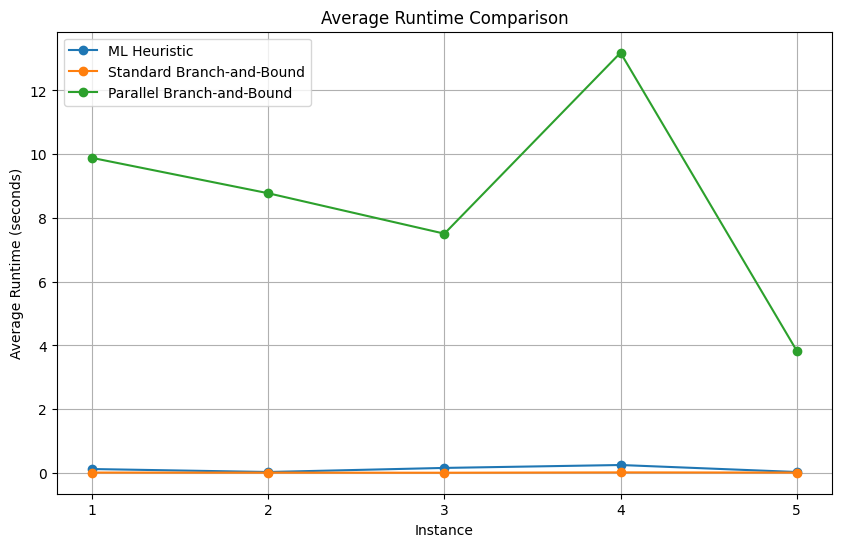

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(ave_ml_runtime, label='ML Heuristic', marker='o')
plt.plot(ave_std_runtime, label='Standard Branch-and-Bound', marker='o')
plt.plot(ave_parallel_runtime, label='Parallel Branch-and-Bound', marker='o')
plt.xlabel('Instance')
plt.ylabel('Average Runtime (seconds)')
plt.title('Average Runtime Comparison')
plt.legend()
plt.grid(True)

# Set x-axis ticks to only show instances 1, 2, 3, 4, and 5
plt.xticks(range(len(ave_ml_runtime)), [str(i) for i in range(1, len(ave_ml_runtime) + 1)])

plt.show() # o

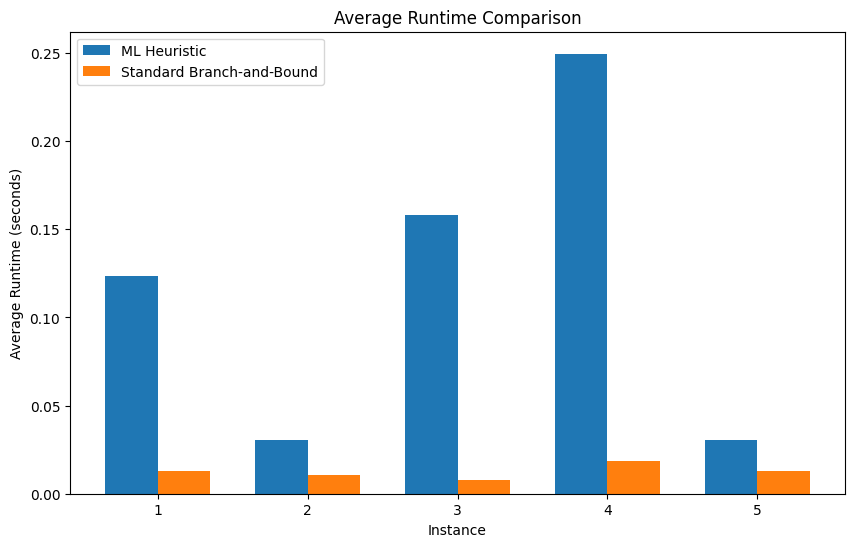

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

num_instances = len(ave_ml_runtime)

x_pos = np.arange(num_instances)
bar_width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x_pos, ave_ml_runtime, bar_width, label='ML Heuristic')
plt.bar(x_pos + bar_width, ave_std_runtime, bar_width, label='Standard Branch-and-Bound')

# Set the x-axis labels to be instances 1, 2, 3, 4, and 5
plt.xticks(x_pos + bar_width / 2, [str(i) for i in range(1, num_instances + 1)])

plt.xlabel('Instance')
plt.ylabel('Average Runtime (seconds)')
plt.title('Average Runtime Comparison')
plt.legend()

plt.show()

In [ ]:
speed_up_parallel = [ave_std_runtime[i]/ave_parallel_runtime[i] for i in range(len(ave_parallel_runtime))]

print("Speed-up of Parallel Branch-and-Bound over Standard Branch-and-Bound:")
print(speed_up_parallel)
average_speed_up_parallel = sum(speed_up_parallel)/len(speed_up_parallel)
print("Average Speed-up of Parallel Branch-and-Bound over Standard Branch-and-Bound:", average_speed_up_parallel)

Speed-up of Parallel Branch-and-Bound over Standard Branch-and-Bound:
[0.0013055634134660102, 0.001241581426290505, 0.0010323154864053119, 0.0013892466714676695, 0.0032996808947610493]
Average Speed-up of Parallel Branch-and-Bound over Standard Branch-and-Bound: 0.001653677578478109


In [ ]:
speed_up_ml = [ave_std_runtime[i]/ave_ml_runtime[i] for i in range(len(ave_ml_runtime))]

print("Speed-up of ML Heuristic over Standard Branch-and-Bound:")
print(speed_up_ml)
average_speed_up_ml = sum(speed_up_ml)/len(speed_up_ml)
print("Average Speed-up of ML Heuristic over Standard Branch-and-Bound:", average_speed_up_ml)

Speed-up of ML Heuristic over Standard Branch-and-Bound:
[0.10454650634095726, 0.35570604581650045, 0.048915099521316535, 0.07336180989460235, 0.41876165451103464]
Average Speed-up of ML Heuristic over Standard Branch-and-Bound: 0.20025822321688222


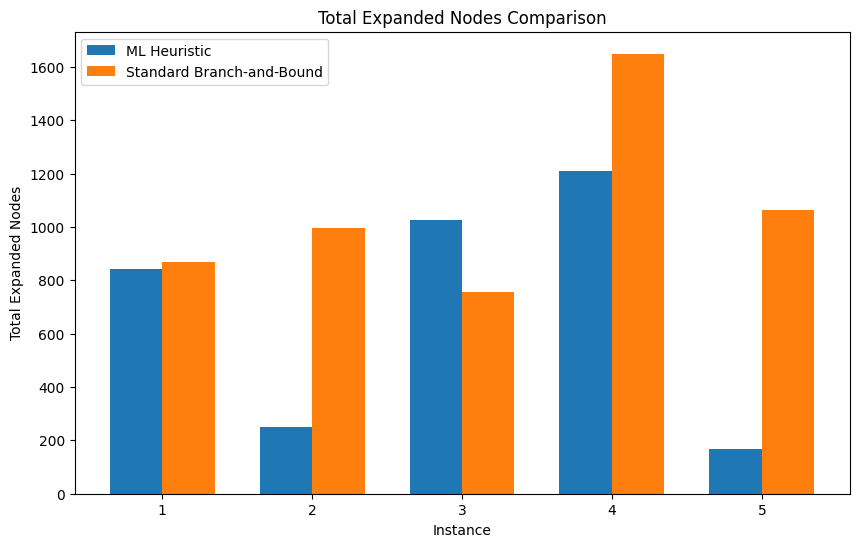

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

num_instances = len(total_exp_nodes_ml)

x_pos = np.arange(num_instances)
bar_width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x_pos, total_exp_nodes_ml, bar_width, label='ML Heuristic')
plt.bar(x_pos + bar_width, total_exp_nodes_std, bar_width, label='Standard Branch-and-Bound')

# Set the x-axis labels to be instances 1, 2, 3, 4, and 5
plt.xticks(x_pos + bar_width / 2, [str(i) for i in range(1, num_instances + 1)])

plt.xlabel('Instance')
plt.ylabel('Total Expanded Nodes')
plt.title('Total Expanded Nodes Comparison')
plt.legend()

plt.show()